# Frame identification

In [3]:
import os

import pandas as pd

import pickle

from sklearn.cluster import AffinityPropagation

from nltk.tokenize import word_tokenize,sent_tokenize

from time import time
from sentence_transformers import SentenceTransformer

import matplotlib.pyplot as plt

from collections import Counter

from time import time
import umap.umap_ as umap

# functions pickle_file and load_pickle help with storing checkpoint files in the event folders on drive
def pickle_file(file_name, file_to_dump):
    directory_path = os.getcwd() + "/../../../../"
    folder_name = file_name.split('_')[0]
    file_path = directory_path +  fr"Dropbox (CBS)/Master thesis data/Candidate Data/{folder_name}/{file_name}"
    with open(file_path, 'wb') as fp:
        pickle.dump(file_to_dump, fp)

def load_pickle(file_name):
    directory_path = os.getcwd() + "/../../../../"
    folder_name = file_name.split('_')[0]
    file_path = directory_path + fr"Dropbox (CBS)/Master thesis data/Candidate Data/{folder_name}/{file_name}"
    with open(file_path, "rb") as input_file:
        return pickle.load(input_file)


In [4]:
def read_event_df(event_name):
    data_url = fr"Dropbox (CBS)/Master thesis data/Event Dataframes/Clean/df_{event_name}_clean.csv"
    directory_path = os.getcwd() + "/../../../../" + data_url 
    event_df = pd.read_csv(directory_path, index_col=0)
    event_df.reset_index(drop=True, inplace=True)
    print(f'loaded {event_df.shape[0]} tweets!')
    return event_df

In [3]:
df_greece = read_event_df('greece')
df_channel = read_event_df('channel')
df_tigray = read_event_df('tigray')
df_rohingya = read_event_df('rohingya')

loaded 137462 tweets!
loaded 173758 tweets!
loaded 42853 tweets!
loaded 29432 tweets!


In [11]:
df_afghan = read_event_df('afghanistan')

loaded 283643 tweets!


In [4]:
file_url = os.getcwd() + "/../../../../" + r"/Dropbox (CBS)/Master thesis data/"
event_url = file_url + r"Event Dataframes/"
event_url_clean = event_url + r"Clean/"

candidate_url = file_url + r"Candidate Data/"

In [5]:
tigray_url_clean = event_url_clean + r"df_tigray_clean.csv" # location of clean Tigray dataset
greece_url_clean = event_url_clean + r"df_greece_clean.csv" # location of clean Greece dataset
rohingya_url_clean = event_url_clean + r"df_rohingya_clean.csv" # location clean of Rohingya dataset
channel_url_clean = event_url_clean +r"df_channel_clean.csv" #Location of clean Channel dataset

In [6]:
tigray_url_fi = event_url_clean + r"df_tigray_fi.csv" # location of Tigray dataset for frame identification
greece_url_fi = event_url_clean + r"df_greece_fi.csv" # location of Greece dataset for frame identification
rohingya_url_fi = event_url_clean + r"df_rohingya_fi.csv" # location of Rohingya dataset for frame identification
channel_url_fi = event_url_clean +r"df_channel_fi.csv" #Location of Channel dataset for frame identification

In [7]:
tigray_candidate_url = candidate_url + r"tigray/tigray_ents"
greece_candidate_url = candidate_url + r"greece/greece_ents"
rohingya_candidate_url = candidate_url + r"rohingya/rohingya_ents"
channel_candidate_url = candidate_url + r"channel/channel_ents"

In [8]:
with open(greece_candidate_url,"rb") as input_file:
    ents = pickle.load(input_file)

In [6]:
def get_entity_list(url):
    with open(url,"rb") as input_file:
        ents = pickle.load(input_file)
        ents = ents[ents["freq"]>15]
        
    return list(ents["entity"])

In [11]:
tigray_ents = get_entity_list(tigray_candidate_url)
greece_ents = get_entity_list(greece_candidate_url)
rohingya_ents = get_entity_list(rohingya_candidate_url)
channel_ents = get_entity_list(channel_candidate_url)

In [7]:
afghan_ents = load_pickle('afghanistan_ents')

In [8]:
def get_most_frequent_words(df_col):
    
    all_words = list()
    
    for words in df_col:
        for word in words:
            all_words.append(word)
            
    counter = Counter(all_words)
    
    return [pair[0] for pair in counter.most_common(int(len(counter)*0.025))] #0.025

In [9]:
def tokenization(df_col):
    """
    Takes a list with strings and returns a list with tokens
    """
    print("Tokenizing tweets...\n")
    return df_col.apply(lambda x: word_tokenize(x))

def remove_unfrequent_words(df_col):
    print("Removing unfrequent words...\n")
    most_frequent_words = get_most_frequent_words(df_col)
    print(f"(Removing words that are not among {len(most_frequent_words)} most frequent ones.)\n")
    return df_col.apply(lambda x: [token for token in x if token in most_frequent_words])

def remove_named_entities(df_col):
    print("Removing named entities...\n")
    return df_col.apply(lambda x: [token for token in x if token not in ne_list])

def preprocessing(df_col, *steps):
    """
    Takes in a dataframe column with text and applies preprocessing steps given 
    in and returns a string.
    
    Input:
    - df (dataframe): The dataframe containing the text column.
    - steps (functions): Multiple functions for preprocessing can be given in.
    
    Output:
    - List with strings.
    """
    # copying over the column for preprocessing
    temp = df_col.copy()
    for func in steps:
        temp = func(temp)
    return temp.apply(lambda x: " ".join([token for token in x]))

In [509]:
df_greece["text_frame_identification"] = preprocessing(df_greece["frame_identification_corpus"],
                                                  tokenization,
                                                  remove_unfrequent_words,
                                                  remove_named_entities)

most_frequent_words = get_most_frequent_words(df_greece["frame_identification_corpus"].apply(lambda x: word_tokenize(x)))
words_to_cluster_greece = [word for word in most_frequent_words if word not in ne_list]

Tokenizing tweets...

Removing unfrequent words...

(Removing words that are not among 1251 most frequent ones.)

Removing named entities...



In [116]:
df_tigray["text_frame_identification"] = preprocessing(df_tigray["frame_identification_corpus"],
                                                  tokenization,
                                                  remove_unfrequent_words,
                                                  remove_named_entities)

most_frequent_words = get_most_frequent_words(df_tigray["frame_identification_corpus"].apply(lambda x: word_tokenize(x)))
words_to_cluster_tigray = [word for word in most_frequent_words if word not in ne_list]

Tokenizing tweets...

Removing unfrequent words...

(Removing words that are not among 649 most frequent ones.)

Removing named entities...



In [117]:
df_channel["text_frame_identification"] = preprocessing(df_channel["frame_identification_corpus"],
                                                  tokenization,
                                                  remove_unfrequent_words,
                                                  remove_named_entities)

most_frequent_words = get_most_frequent_words(df_channel["frame_identification_corpus"].apply(lambda x: word_tokenize(x)))
words_to_cluster_channel = [word for word in most_frequent_words if word not in ne_list]

Tokenizing tweets...

Removing unfrequent words...

(Removing words that are not among 1245 most frequent ones.)

Removing named entities...



In [118]:
df_rohingya["text_frame_identification"] = preprocessing(df_rohingya["frame_identification_corpus"],
                                                  tokenization,
                                                  remove_unfrequent_words,
                                                  remove_named_entities)

most_frequent_words = get_most_frequent_words(df_rohingya["frame_identification_corpus"].apply(lambda x: word_tokenize(x)))
words_to_cluster_rohingya = [word for word in most_frequent_words if word not in ne_list]

Tokenizing tweets...

Removing unfrequent words...

(Removing words that are not among 486 most frequent ones.)

Removing named entities...



In [39]:
df_afghan = df_afghan[~df_afghan["frame_identification_corpus"].isnull()]
df_afghan["text_frame_identification"] = preprocessing(df_afghan["frame_identification_corpus"],
                                                  tokenization,
                                                  remove_unfrequent_words,
                                                  remove_named_entities)

most_frequent_words = get_most_frequent_words(df_afghan["frame_identification_corpus"].apply(lambda x: word_tokenize(x)))
words_to_cluster_afghan = [word for word in most_frequent_words if word not in ne_list]

Tokenizing tweets...

Removing unfrequent words...

(Removing words that are not among 1665 most frequent ones.)

Removing named entities...



In [50]:
len(words_to_cluster_afghan)

1615

In [227]:
df_greece.columns

Index(['source', 'text', 'lang', 'id', 'created_at', 'author_id',
       'retweet_count', 'reply_count', 'like_count', 'quote_count',
       'withheld.scope', 'hashtags', 'mentions', 'annotations', 'text_clean',
       'year', 'calendar_week', 'year_month', 'year_calendar_week', 'refugee',
       'migrant', 'immigrant', 'asylum_seeker', 'other', 'date',
       'text_coherent', 'retweet_count_sum', 'count', 'text_alphanum',
       'text_stm', 'text_frame_identification', 'tok',
       'text_frame_identification_0025', 'text_frame_identification_001',
       'text_frame_identification_005', 'text_frame_identification_01'],
      dtype='object')

In [198]:
df_greece_test = df_greece[["text","parsing_corpus","text_frame_identification","date",'text_frame_identification_0025', 'text_frame_identification_001',
       'text_frame_identification_005', 'text_frame_identification_01']]

In [200]:
#df_greece_test.to_csv('C:\\Users\\jawo19ad\\Documents\\GitHub\\refugee_project\\Code/../../../..//Dropbox (CBS)/Master thesis data/Event Dataframes/Clean/df_greece_fi_test.csv')

In [121]:
df_greece_frame = df_greece[["text","parsing_corpus","text_frame_identification","date"]]
df_tigray_frame = df_tigray[["text","parsing_corpus","text_frame_identification","date"]]
df_rohingya_frame = df_rohingya[["text","parsing_corpus","text_frame_identification","date"]]
df_channel_frame = df_channel[["text","parsing_corpus","text_frame_identification","date"]]

#df_greece_frame.to_csv(greece_url_fi)
#df_tigray_frame.to_csv(tigray_url_fi)
#df_rohingya_frame.to_csv(rohingya_url_fi)
#df_channel_frame.to_csv(channel_url_fi)

## Train BERT

In [9]:
from collections import Counter
def get_most_frequent_words(df_col):
    
    def clean_nes(tweet_words):
        return " ".join([word for word in tweet_words.split() if word not in ne_list])
    #tokenized_cols = df_col.apply(lambda x: word_tokenize(x) if len(x)>0 else x)
    df_col = df_col[~df_col.isnull()] 
    #df_col = df_col.apply(lambda x: print(x.split()) )
    #df_col = df_col.apply(clean_nes)
    #print(df_col)
    counter = Counter(" ".join(df_col).split())
    #print(counter.most_common(200))
    words = [pair[0] for pair in counter.most_common(200)]

    #words = [word for word in words if word not in removed_words]

    return words # list(set(words).difference(set(removed_words)))

def embed_words(words):
    from time import time
    from sentence_transformers import SentenceTransformer
    #sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')
    sbert_model = SentenceTransformer('paraphrase-mpnet-base-v2')

    #bert_corpus = list(words['entity'])

    print(f'there are {len(words)} entities to be encoded')
    t0 = time()
    word_embeddings = sbert_model.encode(words)
    print(f'Training embeddings took {time()-t0} seconds')
    return word_embeddings

In [5]:
ne_list = 'abiy africa ahmed amhara amnesty andrew antony asean assad axum bangladesh bangladeshi biden blinken boris borisjohnson brexit britain british bulgaria burma burmese calais channel china commission coronavirus council coup covid cox dover dublin england english erdogan eritrea eritrean ethiopia ethiopian europe european evros farage filippo france french freya_cole germany grandi greece greek guterres harris hindu hitsats hlaing idlib idp india indian iran isaias jammu johnson junta kachin kadra kamala karen kent labour lesbos maikadra manipur mizoram muslim myanmar nato nigel pakistan patel president priti putin rohingya rohingyas russia russian secretary shimelba shire state sudan sudanese syria syrian thai thailand tigrai tigray tigrayan tigrayans tory tplf trudeau turk turkey turkish unhcr union unsc yangon yemen'.split(" ")

non_framing = 'accept access according across action actually affected agency allow already always another anyone apply april area around arriving asylum away axum back bazar believe better blackout blame boat border broke call called came camp campaign cant case centre change citizen city claim closed coast come coming committed community conflict continue country coup crisis cross daily day deal dear desperate dinghy displaced district done dont east enough enter ethnic every evidence face fact fake find fire first force free full genuine getting give given going good great group happening happeningln hate hlaing hope huge illegally including internally international internet investigation island issue keep land last le leader least leave leaving left life live living local long longer look lost made majority make making many march mass massive maybe mean medium member middle minority missing mission month morning move much nation navy need never news night northern nothing number office official ongoing open opened order part people photo place plan please point population pray praying problem provide public push rapporteur rather reach read real really reason region report reported return right said save say saying seek seeker send sending sent service shame shore show side situation small something source south special staff stand stay still stop story strike sure system taking talk targeted tear tell thank thats theyre thing think time today told towards township truth trying turn united unity urgent urgently used using vice video village villager voice wait want watch water wave week west western whats white without world wrong yangon year yesterday zone'.split(" ")

removed_words = list(set(ne_list + non_framing))

len(removed_words)

364

In [19]:
df_greece = read_event_df('greece')
df_channel = read_event_df('channel')
df_tigray = read_event_df('tigray')
df_rohingya = read_event_df('rohingya')

loaded 137462 tweets!
loaded 173758 tweets!
loaded 42853 tweets!
loaded 29432 tweets!


In [58]:
most_frequent_words_greece = get_most_frequent_words(df_greece["frame_identification_corpus"])
most_frequent_words_channel = get_most_frequent_words(df_channel["frame_identification_corpus"])
most_frequent_words_tigray = get_most_frequent_words(df_tigray["frame_identification_corpus"])
most_frequent_words_rohingya = get_most_frequent_words(df_rohingya["frame_identification_corpus"])
most_frequent_words = list(set(most_frequent_words_greece+most_frequent_words_channel+most_frequent_words_tigray+most_frequent_words_rohingya))

In [12]:
most_frequent_words_afghan = get_most_frequent_words(df_afghan["frame_identification_corpus"])
most_frequent_words_afghan

['refugee',
 'afghan',
 'afghanistan',
 'taliban',
 'country',
 'people',
 'take',
 'help',
 'biden',
 'immigrant',
 'pakistan',
 'american',
 'many',
 'want',
 'government',
 'border',
 'need',
 'would',
 'kabul',
 'year',
 'million',
 'like',
 'migrant',
 'crisis',
 'family',
 'state',
 'thousand',
 'right',
 'welcome',
 'trump',
 'support',
 'india',
 'news',
 'america',
 'time',
 'know',
 'visa',
 'woman',
 'life',
 'home',
 'asylum',
 'back',
 'must',
 'please',
 'muslim',
 'world',
 'coming',
 'come',
 'resettle',
 'call',
 'also',
 'military',
 'going',
 'think',
 'terrorist',
 'taking',
 'dont',
 'say',
 'europe',
 'house',
 'accept',
 'make',
 'could',
 'open',
 'first',
 'turkey',
 'already',
 'citizen',
 'fleeing',
 'even',
 'president',
 'airport',
 'said',
 'safe',
 'child',
 'give',
 'left',
 'ally',
 'sign',
 'nation',
 'canada',
 'petition',
 'still',
 'plan',
 'stop',
 'seeker',
 'housing',
 'well',
 'every',
 'bring',
 'united',
 'leave',
 'patel',
 'special',
 'numbe

In [65]:
def create_frames(embedding, preference, most_frequent_words):
    cluster = AffinityPropagation(preference = preference,  random_state=42).fit(embedding)
    cluster_labels = cluster.labels_
    
    labeled_tweet = pd.DataFrame({'word': most_frequent_words,'label':cluster_labels})
    
    # Create documents per label
    docs_per_class = labeled_tweet.groupby(['label'], as_index=False).agg({'word': ' '.join})

    words_per_class = dict()
    for label,word in zip(docs_per_class['label'],docs_per_class['word']):
        words_per_class[label] = word.split(' ')
    return pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in words_per_class.items() ])).fillna('.').head(50),words_per_class
    

### Greece

In [470]:
len(most_frequent_words_greece)

65

In [471]:
greece_embeddings = embed_words(most_frequent_words_greece)

there are 65 entities to be encoded
Training embeddings took 0.5062229633331299 seconds


In [479]:
start = time()
reduced_embedding_greece = umap.UMAP(random_state=42,
                                     n_components=3,
                                     min_dist=0.1,
                                     n_neighbors = 5).fit_transform(greece_embeddings)
print(f'Duration: {time() - start} seconds')

Duration: 1.668034315109253 seconds


In [575]:
greece_frame_df, greece_frame_dict = create_frames(reduced_embedding_greece,-4,most_frequent_words_greece)

In [ ]:
"""
humanitarian
reception
migration
security
violence
political
economic
military
criminal
"""

In [577]:
pickle_file("greece_frame_devices",greece_frame_dict)

### Channel

In [483]:
len(most_frequent_words_channel)

51

In [484]:
channel_embeddings = embed_words(most_frequent_words_channel)

there are 51 entities to be encoded
Training embeddings took 0.4698755741119385 seconds


In [498]:
start = time()
reduced_embedding_channel = umap.UMAP(random_state=42,
                                     n_components=3,
                                     min_dist=0.1,
                                     n_neighbors = 10).fit_transform(channel_embeddings)
print(f'Duration: {time() - start} seconds')

Duration: 1.7096350193023682 seconds


In [501]:
create_frames(reduced_embedding_channel,-2,most_frequent_words_channel)

,0,1,2,3,4,5,6
0,government,home,economic,illegal,safe,crossing,child
1,legal,hotel,money,racist,help,immigration,work
2,voted,house,million,criminal,benefit,fleeing,family
3,policy,welcome,thousand,police,support,invasion,human
4,rule,housing,poor,illegals,control,migration,woman
5,govt,homeless,paying,crime,care,entering,working
6,vote,.,cost,.,death,arrive,job
7,law,.,paid,.,risk,.,.
8,taxpayer,.,.,.,.,.,.


In [560]:
channel_frame_df, channel_frame_dict = create_frames(reduced_embedding_channel,-2,most_frequent_words_channel)

In [562]:
pickle_file("channel_frame_devices",channel_frame_dict)

In [ ]:
"""
political
accomodation
economisation
criminality
support
migration
integration
"""

### Tigray

In [504]:
len(most_frequent_words_tigray)

76

In [505]:
tigray_embeddings = embed_words(most_frequent_words_tigray)

there are 76 entities to be encoded
Training embeddings took 0.8544445037841797 seconds


In [524]:
start = time()
reduced_embedding_tigray = umap.UMAP(random_state=42,
                                     n_components=3,
                                     min_dist=0.1,
                                     n_neighbors = 5).fit_transform(tigray_embeddings)
print(f'Duration: {time() - start} seconds')

Duration: 1.4146029949188232 seconds


In [530]:
create_frames(reduced_embedding_tigray,-10,most_frequent_words_tigray)

,0,1,2,3,4,5,6,7
0,million,fled,food,civilian,crime,genocide,innocent,human
1,thousand,fleeing,starvation,militia,rape,killed,protect,humanitarian
2,hundred,flee,starving,government,violence,killing,care,woman
3,.,.,famine,troop,raped,massacre,peace,help
4,.,.,hunger,soldier,terrorist,destroyed,safe,child
5,.,.,.,army,criminal,looting,safety,home
6,.,.,.,military,forced,death,health,support
7,.,.,.,govt,atrocity,massacred,protection,family
8,.,.,.,dictator,attack,looted,security,assistance
9,.,.,.,.,victim,destruction,.,work


In [563]:
tigray_frame_df, tigray_frame_dict = create_frames(reduced_embedding_tigray,-10,most_frequent_words_tigray)

In [565]:
pickle_file("tigray_frame_devices",tigray_frame_dict)

In [ ]:
"""
misc
misc
vulnerabilty
political/military
criminality
violence
support/protection (maybe even outreach)
humanitarian
"""

### Rohingya

In [531]:
len(most_frequent_words_rohingya)

79

In [532]:
rohingya_embeddings = embed_words(most_frequent_words_rohingya)

there are 79 entities to be encoded
Training embeddings took 0.8724038600921631 seconds


In [545]:
start = time()
reduced_embedding_rohingya = umap.UMAP(random_state=42,
                                     n_components=3,
                                     min_dist=0.1,
                                     n_neighbors = 10).fit_transform(rohingya_embeddings)
print(f'Duration: {time() - start} seconds')

Duration: 1.4543967247009277 seconds


In [552]:
create_frames(reduced_embedding_rohingya,-4,most_frequent_words_rohingya)

,0,1,2,3,4,5,6,7,8
0,military,child,killed,government,fleeing,terrorist,thousand,shelter,help
1,army,human,killing,illegal,fled,airstrikes,hundred,food,humanitarian
2,civilian,home,dead,authority,flee,attack,million,safe,support
3,soldier,family,massacre,democracy,deportation,police,.,safety,supply
4,brigade,house,genocide,forced,.,violence,.,injured,donation
5,fighter,worker,death,govt,.,crackdown,.,suppression,supporting
6,armed,woman,devastating,court,.,crime,.,security,emergency
7,jet,humanity,destroyed,detained,.,attacked,.,protect,assistance
8,.,homeless,burnt,forcing,.,besieging,.,health,donate
9,.,work,died,envoy,.,bombing,.,innocent,aid


In [566]:
rohingya_frame_df, rohingya_frame_dict = create_frames(reduced_embedding_rohingya,-4,most_frequent_words_rohingya)

In [568]:
pickle_file("rohingya_frame_devices",rohingya_frame_dict)

In [ ]:
"""
military
protection
violence
political
misc
violence (merge with other)
misc
protection (merge with other)
humanitarian
"""

### Afghanistan

In [13]:
afghan_words = "thousand million afghan afghani afghanistan airbnb also america american behind bring bringing canada could decade even immediately immigrant immigration islamic kabul know like migrant miller must next possible process program ready refugee sign since start take taliban trump uganda well would".split(" ")
removed_words = list(set(removed_words+afghan_words))

In [14]:
most_frequent_words_afghan = [word for word in most_frequent_words_afghan if word not in removed_words]
len(most_frequent_words_afghan)

52

In [15]:
afghan_embeddings = embed_words(most_frequent_words_afghan)

there are 52 entities to be encoded
Training embeddings took 1.3283207416534424 seconds


In [33]:
start = time()
reduced_embedding_afghan= umap.UMAP(random_state=42,
                                     n_components=2,
                                     min_dist=0.00001,
                                     n_neighbors = 5).fit_transform(afghan_embeddings)
print(f'Duration: {time() - start} seconds')

Duration: 2.1852686405181885 seconds


<AxesSubplot:>

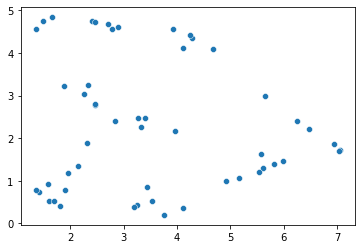

In [34]:
import seaborn

seaborn.scatterplot(x = reduced_embedding_afghan[:, 0],
                y = reduced_embedding_afghan[:, 1], palette ="Paired")

In [35]:
cluster = AffinityPropagation(preference = -7,  random_state=42).fit(reduced_embedding_afghan)
cluster_labels = cluster.labels_

<AxesSubplot:>

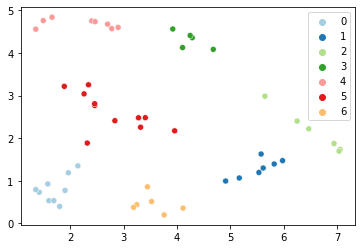

In [36]:
import seaborn

seaborn.scatterplot(x = reduced_embedding_afghan[:, 0],
                y = reduced_embedding_afghan[:, 1],
                hue = cluster_labels, palette ="Paired")

In [138]:
create_frames(reduced_embedding_afghan,-7,most_frequent_words_afghan)[0]

,0,1,2,3,4
0,family,military,resettle,help,government
1,welcome,terrorist,fleeing,support,visa
2,home,safe,airport,woman,petition
3,house,troop,evacuation,ally,illegal
4,child,fear,resettlement,care,humanitarian
5,housing,base,plane,work,republican
6,host,attack,evacuate,helping,administration
7,.,security,flight,helped,takeover
8,.,killed,.,effort,govt
9,.,safety,.,offer,policy


In [139]:
afghan_frame_df, afghan_frame_dict = create_frames(reduced_embedding_afghan,-7,most_frequent_words_afghan)

In [141]:
pickle_file("afghanistan_frame_devices",afghan_frame_dict)

In [ ]:
load